Found 234 normal images in the specified directory.
The dimensions of the first image are: (1442, 770)


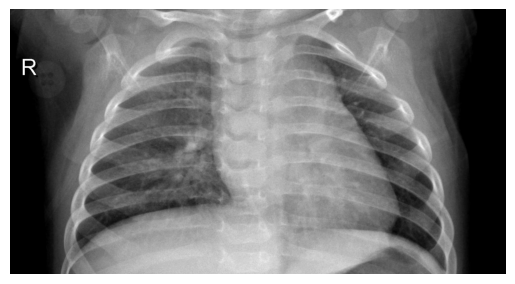

In [1]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np

# If we want to import the pictures from google drive into colab, we can also do that...

# Set the path to your image directory
normal_images_dir = '../../data/test/NORMAL'  # Adjust this to match your folder structure

# List all files in the folder
normal_images = [f for f in os.listdir(normal_images_dir) if f.endswith('.jpeg') or f.endswith('.jpg')]

# Print the number of images found
print(f"Found {len(normal_images)} normal images in the specified directory.")

# Load the first image
if normal_images:
    first_image_path = os.path.join(normal_images_dir, normal_images[0])
    first_image = Image.open(first_image_path)
    print(f"The dimensions of the first image are: {first_image.size}")
    
    # Display the first image
    plt.imshow(first_image, cmap='gray')
    plt.axis('off')  # Hide axes for better visualization
    plt.show()
else:
    print("No images found in the specified directory.")


Found 390 pneumonia images in the specified directory.
The dimensions of the first pneumonia image are: (856, 480)


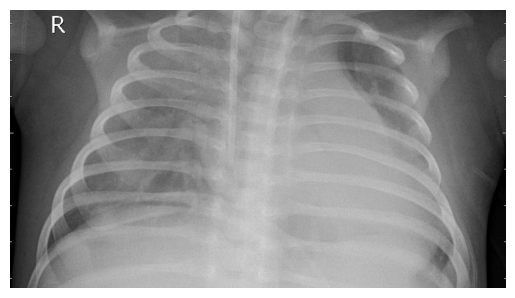

In [2]:
# Now let's import the images with pneumonia
pneumonia_images_dir = '../../data/test/PNEUMONIA'

# List all the pneumonia images
pneumonia_images = [f for f in os.listdir(pneumonia_images_dir) if f.endswith('.jpeg') or f.endswith('.jpg')]

# Print the number of pneumonia images found
print(f"Found {len(pneumonia_images)} pneumonia images in the specified directory.")

# Load the first pneumonia image
if pneumonia_images:
    first_pneumonia_image_path = os.path.join(pneumonia_images_dir, pneumonia_images[0])
    first_pneumonia_image = Image.open(first_pneumonia_image_path)
    print(f"The dimensions of the first pneumonia image are: {first_pneumonia_image.size}")
    
    # Display the first pneumonia image
    plt.imshow(first_pneumonia_image, cmap='gray')
    plt.axis('off')  # Hide axes for better visualization
    plt.show()

We can see that both images are not of the same dimension and we can see it in the sample pictures, so these will need to be scaled once we feed them into the pretrained models

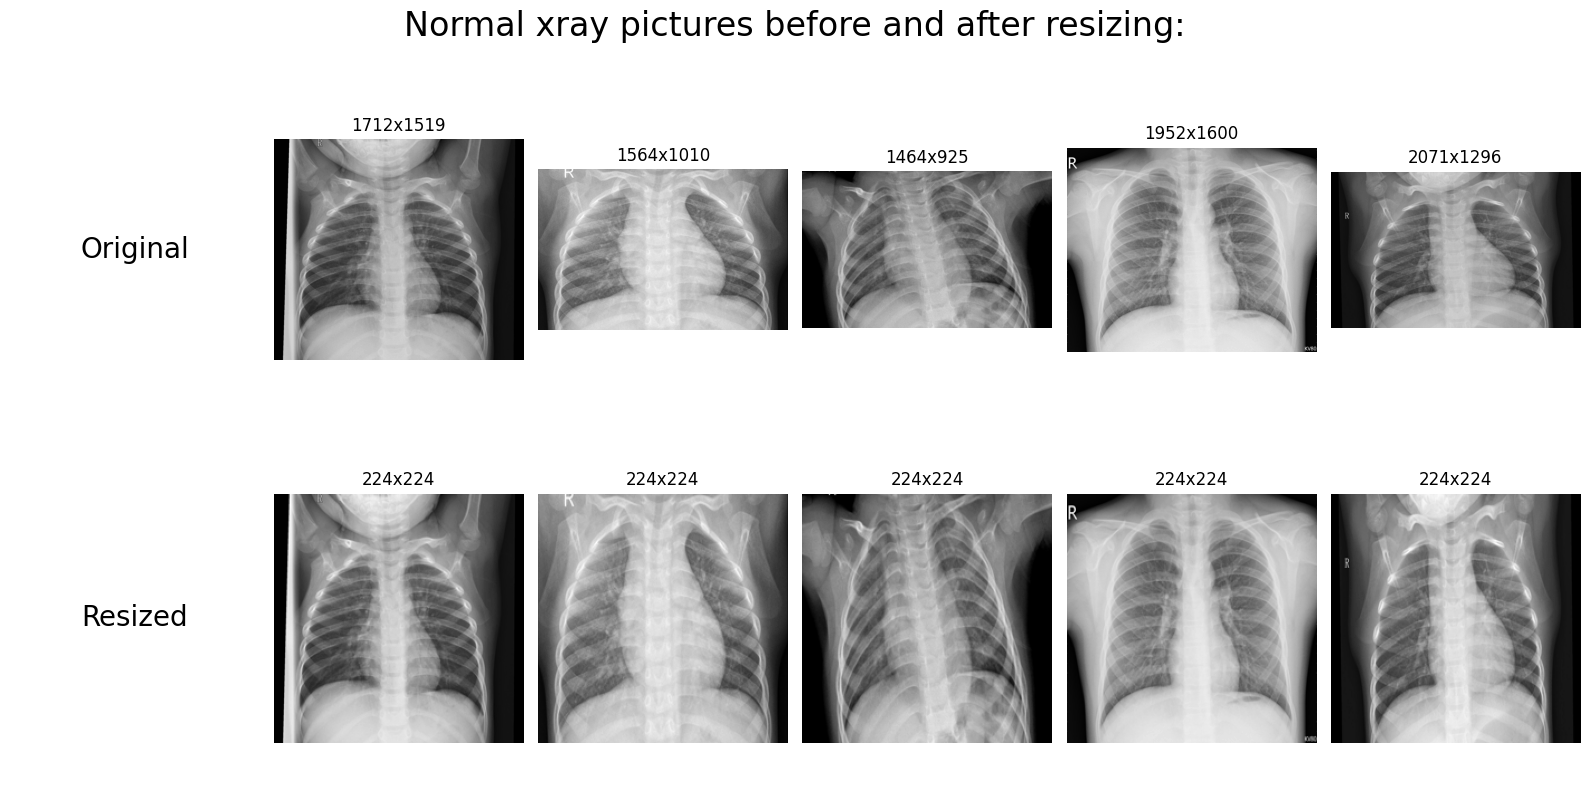

In [3]:
# Let's see how the images look like before and after resizing
sample_size = 5
image_size = (224, 224)  # Resize target

# Randomly sample images from each category
sampled_normal_images = np.random.choice(normal_images, sample_size, replace=False)
sampled_pneumonia_images = np.random.choice(pneumonia_images, sample_size, replace=False)

# Define the figure layout
fig = plt.figure(figsize=(16, 8))
fig.suptitle("Normal xray pictures before and after resizing:", fontsize=24, y=1)

# Function to open, resize, and return an image
def load_and_resize_image(image_path, size):
    image = Image.open(image_path).convert("L")  # Convert to grayscale
    resized_image = image.resize(size)  # Resize image to target dimensions
    return image, resized_image

# Add title for original images
ax = plt.subplot(2, sample_size + 1, 1)
ax.text(0.5, 0.5, 'Original', fontsize=20, ha='center', va='center')
plt.axis('off')

# Display the original images on top row with their dimensions
for i, image_name in enumerate(sampled_normal_images):
    original, resized = load_and_resize_image(os.path.join(normal_images_dir, image_name), image_size)
    
    # Original image with its dimensions
    ax = plt.subplot(2, sample_size + 1, i + 2)
    plt.imshow(original, cmap='gray')
    original_dims = f"{original.size[0]}x{original.size[1]}"
    plt.title(original_dims, fontsize=12)
    plt.axis('off')

# Add title for resized images
ax = plt.subplot(2, sample_size + 1, sample_size + 2)
ax.text(0.5, 0.5, 'Resized', fontsize=20, ha='center', va='center')
plt.axis('off')

# Display the resized images on bottom row with the target dimensions
for i, image_name in enumerate(sampled_normal_images):
    original, resized = load_and_resize_image(os.path.join(normal_images_dir, image_name), image_size)
    
    # Resized image with new dimensions
    ax = plt.subplot(2, sample_size + 1, sample_size + i + 3)
    plt.imshow(resized, cmap='gray')
    resized_dims = f"{resized.size[0]}x{resized.size[1]}"
    plt.title(resized_dims, fontsize=12)
    plt.axis('off')

# Show plot
plt.tight_layout()
plt.show()

As we can observe from the resizing of the images, they look recognizable and there doesn't appear to be much of a significant loss of information following the resizing of the images.

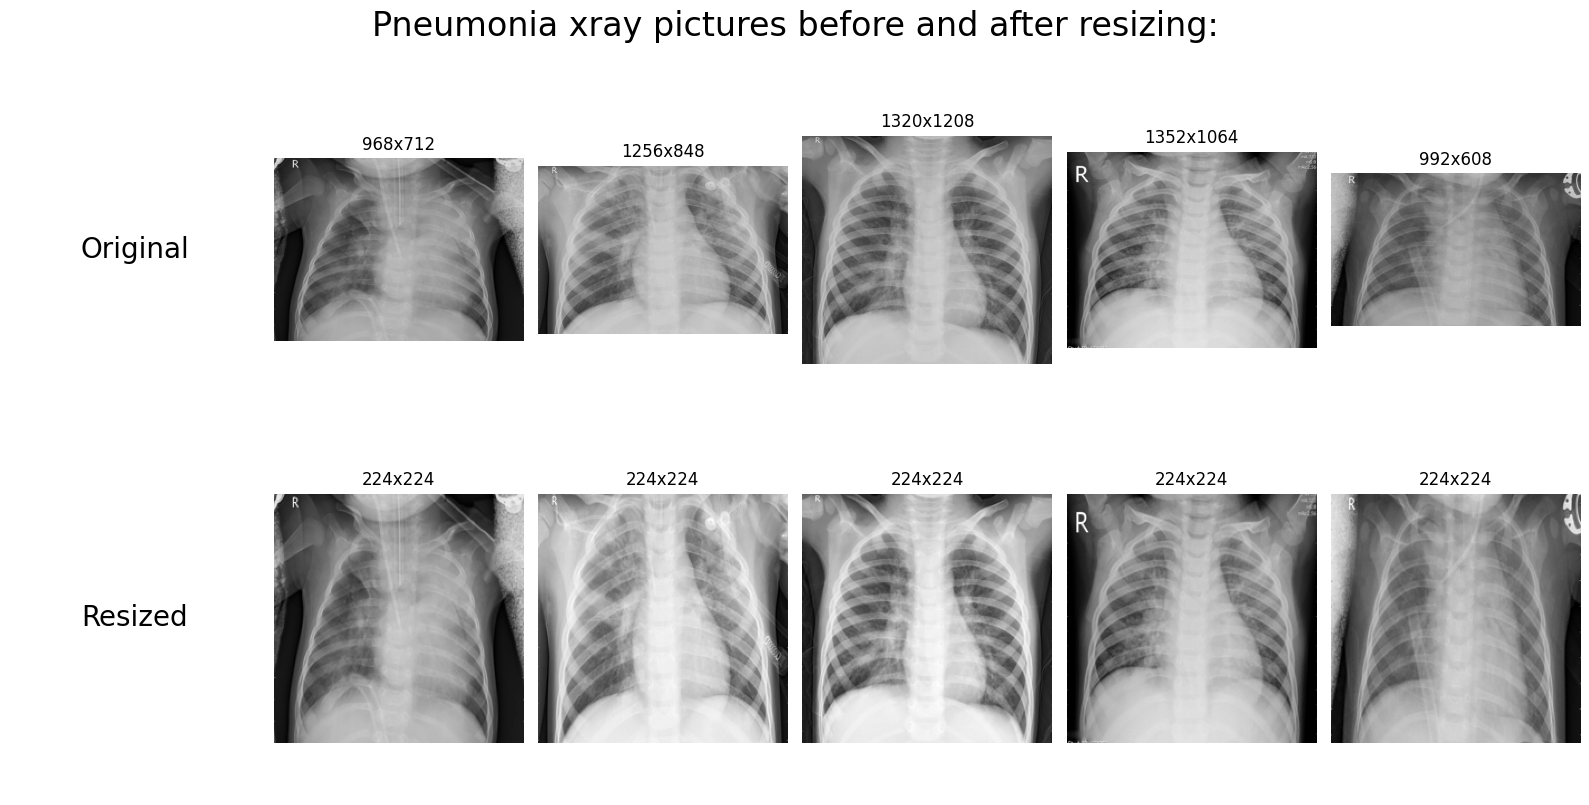

In [4]:
# Let's see how the pneumonia images look like before and after resizing
fig = plt.figure(figsize=(16, 8))
fig.suptitle("Pneumonia xray pictures before and after resizing:", fontsize=24, y=1)

# Add title for original images
ax = plt.subplot(2, sample_size + 1, 1)
ax.text(0.5, 0.5, 'Original', fontsize=20, ha='center', va='center')
plt.axis('off')

# Display the original images on top row with their dimensions
for i, image_name in enumerate(sampled_pneumonia_images):
    original, resized = load_and_resize_image(os.path.join(pneumonia_images_dir, image_name), image_size)
    
    # Original image with its dimensions
    ax = plt.subplot(2, sample_size + 1, i + 2)
    plt.imshow(original, cmap='gray')
    original_dims = f"{original.size[0]}x{original.size[1]}"
    plt.title(original_dims, fontsize=12)
    plt.axis('off')

# Add title for resized images
ax = plt.subplot(2, sample_size + 1, sample_size + 2)
ax.text(0.5, 0.5, 'Resized', fontsize=20, ha='center', va='center')
plt.axis('off')

# Display the resized images on bottom row with the target dimensions
for i, image_name in enumerate(sampled_pneumonia_images):
    original, resized = load_and_resize_image(os.path.join(pneumonia_images_dir, image_name), image_size)
    
    # Resized image with new dimensions
    ax = plt.subplot(2, sample_size + 1, sample_size + i + 3)
    plt.imshow(resized, cmap='gray')
    resized_dims = f"{resized.size[0]}x{resized.size[1]}"
    plt.title(resized_dims, fontsize=12)
    plt.axis('off')

# Show plot
plt.tight_layout()
plt.show()

Pneumonia images seem to retain most of their information as well!

Load the data

In [27]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import os
import math
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

# CPU configuration
num_cores = math.floor(os.cpu_count() * 0.75)

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Paths
train_dir = '../../data/train'
test_dir = '../../data/test'

# Function to compute mean and std of a dataset
def compute_dataset_stats(dataset, batch_size=128, num_cores=4):
    """
    Compute the mean and standard deviation of the dataset.
    Args:
        dataset: The dataset to compute statistics for.
        batch_size: The batch size for data loading.
        num_cores: Number of cores to use for data loading.
    Returns:
        mean (torch.Tensor), std (torch.Tensor): Per-channel statistics for the dataset.
    """
    # Create a DataLoader for the dataset
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=False, num_workers=num_cores, pin_memory=True)
    
    # Initialize variables to store the running sum and squared sum for mean and std
    mean = torch.zeros(3)
    std = torch.zeros(3)
    total_samples = 0
    
    for images, _ in loader:
        # Compute the mean and std for this batch
        batch_mean = images.mean(dim=[0, 2, 3])
        batch_std = images.std(dim=[0, 2, 3])
        
        # Update the running sum and count for mean and std
        mean += batch_mean * images.size(0)
        std += batch_std * images.size(0)
        total_samples += images.size(0)
    
    # Compute the overall mean and std
    mean /= total_samples
    std /= total_samples
    
    return mean, std

# Load the datasets with initial transforms (grayscale -> RGB conversion)
initial_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert grayscale to RGB
    transforms.Resize((224, 224)),               # Resize to ResNet input size
    transforms.ToTensor(),                       # Convert to tensor
])

train_dataset = datasets.ImageFolder(root=train_dir, transform=initial_transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=initial_transform)

# Compute statistics (mean and std) for the training dataset
train_mean, train_std = compute_dataset_stats(train_dataset)
print(f"Train Dataset Mean: {train_mean}")
print(f"Train Dataset Std: {train_std}\n")

# Define transforms for train with computed mean and std
train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert grayscale to RGB
    transforms.Resize((224, 224)),               # Resize to ResNet input size
    transforms.ToTensor(),                       # Convert to tensor
    transforms.Normalize(mean=train_mean.tolist(), std=train_std.tolist())  # Use computed mean and std for train
])

# Reload the train dataset with the updated transform
train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transform)

# Compute statistics for the test dataset
test_mean, test_std = compute_dataset_stats(test_dataset)
print(f"Test Dataset Mean: {test_mean}")
print(f"Test Dataset Std: {test_std}")

# Define transforms for test with computed mean and std
test_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert grayscale to RGB
    transforms.Resize((224, 224)),               # Resize to ResNet input size
    transforms.ToTensor(),                       # Convert to tensor
    transforms.Normalize(mean=test_mean.tolist(), std=test_std.tolist())  # Use computed mean and std for test
])

# Reload the test dataset with the updated transform
test_dataset = datasets.ImageFolder(root=test_dir, transform=test_transform)

# Function to print class distribution
def print_class_distribution(dataset, dataset_name):
    if isinstance(dataset, Subset):
        targets = np.array([dataset.dataset.samples[i][1] for i in dataset.indices])
        classes = dataset.dataset.classes
        root = dataset.dataset.root
    else:
        targets = np.array([label for _, label in dataset.samples])
        classes = dataset.classes
        root = dataset.root

    class_counts = np.bincount(targets)

    print(f"Class distribution in {dataset_name} dataset:")
    for idx, count in enumerate(class_counts):
        print(f"Class {classes[idx]}: {count} samples")
    print(f"Directory: {root}")
    print()

# Print class distribution for the train and test datasets
print_class_distribution(train_dataset, "train")
print_class_distribution(test_dataset, "test")

# Example Usage for subsampling (stratified)
random_state_value = 42  # Or any integer you prefer for reproducibility
n_train_samples = 0
n_test_samples = 0

# Apply stratified subsampling
def stratified_subsample(dataset, N_train_samples, random_state=None):
    """
    Subsample the dataset with a stratified approach, ensuring that the
    total number of samples equals N_train_samples.

    Args:
        dataset: PyTorch dataset (e.g., ImageFolder).
        N_train_samples: Total number of samples in the subsample.
        random_state: Seed for reproducibility (None for random, integer for fixed seed).

    Returns:
        A subset of the dataset with the desired stratified sampling.
    """
    # Extract the labels (class labels)
    targets = np.array([label for _, label in dataset.samples]) 
    
    # Get class counts
    class_counts = np.bincount(targets)
    
    # Calculate the total number of classes
    n_classes = len(class_counts)
    
    # Compute the proportion of each class in the dataset
    class_proportions = class_counts / class_counts.sum()
    
    # Calculate the number of samples to take from each class
    N_samples_per_class = (class_proportions * N_train_samples).astype(int)

    # Ensure the total number of samples equals N_train_samples
    while N_samples_per_class.sum() != N_train_samples:
        # Adjust the last class to match the total number of samples
        N_samples_per_class[-1] = N_train_samples - N_samples_per_class[:-1].sum()

    # Stratified Shuffle Split to sample from the dataset with a random_state parameter
    sss = StratifiedShuffleSplit(n_splits=1, train_size=N_train_samples, random_state=random_state)
    
    for train_idx, _ in sss.split(np.zeros(len(targets)), targets):
        # Subset the dataset based on the computed indices
        return Subset(dataset, train_idx)

# Apply stratified subsampling
if n_train_samples != 0:
    train_dataset = stratified_subsample(train_dataset, n_train_samples, random_state=random_state_value)
else:
    print("!!! Using all of the training dataset !!!")

if n_test_samples != 0:
    test_dataset = stratified_subsample(test_dataset, n_test_samples, random_state=random_state_value)
else:
    print("!!! Using all of the test dataset !!!")

# Print class distribution after subsampling
print_class_distribution(train_dataset, "train (after subsampling)")
print_class_distribution(test_dataset, "test (after subsampling)")

# Create DataLoaders
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_cores, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_cores, pin_memory=True)

# Checking a batch of data (for debugging purposes)
for images, labels in train_loader:
    images, labels = images.to(device), labels.to(device)
    print(f"Images batch shape: {images.shape}")
    print(f"Labels batch shape: {labels.shape}")
    break

# Check the mean and std after normalization
def compute_normalized_stats(dataset, batch_size=128, num_cores=4):
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=False, num_workers=num_cores, pin_memory=True)
    
    mean = torch.zeros(3)
    std = torch.zeros(3)
    total_samples = 0
    
    for images, _ in loader:
        # Compute the mean and std for this batch
        batch_mean = images.mean(dim=[0, 2, 3])
        batch_std = images.std(dim=[0, 2, 3])
        
        # Update the running sum and count for mean and std
        mean += batch_mean * images.size(0)
        std += batch_std * images.size(0)
        total_samples += images.size(0)
    
    # Compute the overall mean and std
    mean /= total_samples
    std /= total_samples
    
    return mean, std

# Check stats after normalization for both train and test datasets
train_mean, train_std = compute_normalized_stats(train_dataset)
test_mean, test_std = compute_normalized_stats(test_dataset)

print(f"Train dataset mean: {train_mean}")
print(f"Train dataset std: {train_std}")
print(f"Test dataset mean: {test_mean}")
print(f"Test dataset std: {test_std}")

Train Dataset Mean: tensor([0.4823, 0.4823, 0.4823])
Train Dataset Std: tensor([0.2352, 0.2352, 0.2352])

Test Dataset Mean: tensor([0.4747, 0.4747, 0.4747])
Test Dataset Std: tensor([0.2353, 0.2353, 0.2353])
Class distribution in train dataset:
Class NORMAL: 1341 samples
Class PNEUMONIA: 3875 samples
Directory: ../../data/train

Class distribution in test dataset:
Class NORMAL: 234 samples
Class PNEUMONIA: 390 samples
Directory: ../../data/test

!!! Using all of the training dataset !!!
!!! Using all of the test dataset !!!
Class distribution in train (after subsampling) dataset:
Class NORMAL: 1341 samples
Class PNEUMONIA: 3875 samples
Directory: ../../data/train

Class distribution in test (after subsampling) dataset:
Class NORMAL: 234 samples
Class PNEUMONIA: 390 samples
Directory: ../../data/test

Images batch shape: torch.Size([128, 3, 224, 224])
Labels batch shape: torch.Size([128])
Train dataset mean: tensor([-4.1419e-07, -4.1419e-07, -4.1419e-07])
Train dataset std: tensor([1.,

In [28]:
from sklearn.model_selection import StratifiedKFold
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from torchvision import models
from torchvision.models import ResNet18_Weights
import matplotlib.pyplot as plt
import numpy as np
import copy
from torch import amp


In [29]:
def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == labels).sum().item()
    return correct / labels.size(0)

In [30]:
def train_and_evaluate(train_indices, val_indices, dataset, batch_size, device, num_classes, num_cores, learning_rate, epochs, patience=5, min_delta=0.001):
    """
    Trains and evaluates the model for the given train and validation indices.
    Incorporates learning rate scheduling, early stopping mechanisms, and mixed precision training using GradScaler.
    """
    # Create DataLoaders for train and validation subsets
    train_data = Subset(dataset, train_indices)
    val_data = Subset(dataset, val_indices)
    
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_cores, pin_memory=True)
    val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, num_workers=num_cores, pin_memory=True)
    
    print(f"            Training samples: {len(train_data)}, Validation samples: {len(val_data)}\n")
    
    # Load the pre-trained ResNet-18 model
    model = models.resnet18(weights=ResNet18_Weights.DEFAULT)
    model.fc = nn.Linear(model.fc.in_features, num_classes)
    model = model.to(device)
    
    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate)
    
    # Learning Rate Scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3)
    
    # Mixed Precision Training - GradScaler
    scaler = amp.GradScaler()

    train_losses, val_losses = [], []
    train_accs, val_accs = [], []
    
    best_val_loss = float('inf')
    no_improvement_counter = 0  # Early stopping counter
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        running_acc = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            # Use autocast for mixed precision
            with amp.autocast(device_type='cuda'):  # Automatically choose float16 where possible
                outputs = model(images)
                loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            
            # Scaled loss backward pass
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()  # Update the scale for next iteration

            # Metrics
            running_loss += loss.item()
            running_acc += calculate_accuracy(outputs, labels)

        train_losses.append(running_loss / len(train_loader))
        train_accs.append(running_acc / len(train_loader))

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_acc = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                
                # Use autocast for mixed precision in validation as well
                with amp.autocast(device_type='cuda'):
                    outputs = model(images)
                    loss = criterion(outputs, labels)

                val_loss += loss.item()
                val_acc += calculate_accuracy(outputs, labels)

        val_losses.append(val_loss / len(val_loader))
        val_accs.append(val_acc / len(val_loader))
        
        # Early stopping based on validation loss
        if val_loss < best_val_loss - min_delta:
            best_val_loss = val_loss
            no_improvement_counter = 0
        else:
            no_improvement_counter += 1
        
        # If no improvement for 'patience' epochs, stop training
        if no_improvement_counter >= patience:
            print(f"Early stopping triggered after {epoch + 1} epochs")
            break
        
        # Adjust learning rate if validation loss plateaus
        scheduler.step(val_loss)

        print(f"            Epoch {epoch + 1}/{epochs} - Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accs[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accs[-1]:.4f}")

    return model, train_losses, train_accs, val_losses, val_accs


In [31]:
def save_plot(fig, directory, filename):
    """Utility function to save a matplotlib figure."""
    os.makedirs(directory, exist_ok=True)
    fig.savefig(os.path.join(directory, filename))
    plt.close(fig)

In [ ]:
def cross_validation(train_dataset, test_dataset, outer_folds, inner_folds, batch_size, device, num_classes, num_cores, learning_rate, epochs, random_state):
    """
    Conducts nested cross-validation with the provided dataset and evaluates the best model on the test_dataset.
    Saves plots and stores the final model globally.
    """
    global final_model  # To store the final model globally
    outer_results = []
    outer_skf = StratifiedKFold(n_splits=outer_folds, shuffle=True, random_state=random_state)
    
    # Get dataset targets
    if isinstance(train_dataset, Subset):
        targets = np.array([train_dataset.dataset.samples[i][1] for i in train_dataset.indices])
    else:
        targets = np.array([label for _, label in train_dataset.samples])
    
    # Outer Cross-Validation Loop
    for outer_fold, (train_indices, test_indices) in enumerate(outer_skf.split(range(len(train_dataset)), targets)):
        print(f"\n=== Outer Fold {outer_fold + 1}/{outer_folds} ===")
        print(f"    Test samples (outer fold split): {len(test_indices)}")
        
        inner_skf = StratifiedKFold(n_splits=inner_folds, shuffle=True, random_state=random_state)
        best_model, best_val_acc = None, 0

        # Initialize a dictionary to store results for this outer fold
        outer_fold_result = {
            "outer_fold": outer_fold + 1,
            "test_loss": None,
            "test_accuracy": None
        }
        
        # Inner Cross-Validation Loop
        for inner_fold, (inner_train_indices, inner_val_indices) in enumerate(inner_skf.split(
                np.array(train_indices), np.array(targets[train_indices]))):
            print(f"        --- Inner Fold {inner_fold + 1}/{inner_folds} ---\n")
            
            # Train and Evaluate Model
            model, train_losses, train_accs, val_losses, val_accs = train_and_evaluate(
                np.array(train_indices)[inner_train_indices],
                np.array(train_indices)[inner_val_indices],
                train_dataset, batch_size, device, num_classes, num_cores, learning_rate, epochs
            )
            
            # Plot Training and Validation Metrics
            fig = plt.figure(figsize=(12, 6))
            
            # Loss Plot
            plt.subplot(1, 2, 1)
            plt.plot(val_losses, color="C0", label='Validation Loss')
            plt.plot(train_losses, color="C1", label='Train Loss')
            plt.scatter(np.argmin(val_losses), min(val_losses), color='C0')
            plt.scatter(np.argmin(train_losses), min(train_losses), color='C1')
            plt.legend()
            plt.title(f"Inner Fold {inner_fold + 1} Loss")
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            
            # Accuracy Plot
            plt.subplot(1, 2, 2)
            plt.plot(val_accs, color="C0", label='Validation Accuracy')
            plt.plot(train_accs, color="C1", label='Train Accuracy')
            plt.scatter(np.argmax(val_accs), max(val_accs), color='C0')
            plt.scatter(np.argmax(train_accs), max(train_accs), color='C1')
            plt.legend()
            plt.title(f"Inner Fold {inner_fold + 1} Accuracy")
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            
            save_plot(fig, "plots", f"outer_{outer_fold + 1}_inner_{inner_fold + 1}.png")

            # Log Inner Fold Results
            print(f"\n            Final Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accs[-1]:.4f}")
            print(f"            Final Validation Loss: {val_losses[-1]:.4f}, Validation Accuracy: {val_accs[-1]:.4f}\n")

            # Select Best Model Based on Validation Accuracy
            max_val_acc = max(val_accs)
            if max_val_acc > best_val_acc:
                best_val_acc = max_val_acc
                best_model = copy.deepcopy(model)
                
            print('-' * 150)
        
        # Evaluate the Best Model on the Test Dataset
        print("        Evaluating the best model on the test dataset...")
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_cores, pin_memory=True)
        best_model.eval()
        test_loss, test_acc = 0.0, 0.0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = best_model(images)
                loss = torch.nn.CrossEntropyLoss()(outputs, labels)
                test_loss += loss.item()
                test_acc += calculate_accuracy(outputs, labels)
        
        test_loss /= len(test_loader)
        test_acc /= len(test_loader)
        
        # Update the outer fold result
        outer_fold_result["test_loss"] = test_loss
        outer_fold_result["test_accuracy"] = test_acc
        outer_results.append(outer_fold_result)
        
        print(f"        Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}\n")
        print('|' * 150)

    return outer_results, best_model


In [34]:
import pandas as pd
import os


# Example usage
results, final_model = cross_validation(
    train_dataset=train_dataset, 
    test_dataset=test_dataset,  # Directly pass test_dataset
    outer_folds=10, 
    inner_folds=10, 
    batch_size=128, 
    device=device, 
    num_classes=2, 
    num_cores=num_cores, 
    learning_rate=0.001, 
    epochs=10,
    random_state=42
)


=== Outer Fold 1/10 ===
    Test samples (outer fold split): 522
        --- Inner Fold 1/10 ---
            Training samples: 4224, Validation samples: 470

            Epoch 1/10 - Train Loss: 0.2001, Train Accuracy: 0.9103, Val Loss: 0.0801, Val Accuracy: 0.9688
            Epoch 2/10 - Train Loss: 0.0413, Train Accuracy: 0.9860, Val Loss: 0.2053, Val Accuracy: 0.9289
            Epoch 3/10 - Train Loss: 0.0202, Train Accuracy: 0.9934, Val Loss: 0.0377, Val Accuracy: 0.9825
            Epoch 4/10 - Train Loss: 0.0129, Train Accuracy: 0.9967, Val Loss: 0.0368, Val Accuracy: 0.9902
            Epoch 5/10 - Train Loss: 0.0047, Train Accuracy: 0.9991, Val Loss: 0.0478, Val Accuracy: 0.9844
            Epoch 6/10 - Train Loss: 0.0026, Train Accuracy: 0.9995, Val Loss: 0.0266, Val Accuracy: 0.9893
            Epoch 7/10 - Train Loss: 0.0031, Train Accuracy: 0.9988, Val Loss: 0.0468, Val Accuracy: 0.9805
            Epoch 8/10 - Train Loss: 0.0105, Train Accuracy: 0.9960, Val Loss: 0.0677

KeyboardInterrupt: 

In [26]:
# # Convert results to a DataFrame for better presentation
df_results = pd.DataFrame(results)

# Print the summary table
print("\nOuter Fold Summary:")
print(df_results)

# # You can also save this table to a CSV file if needed
# results.to_csv('cross_validation_results.csv', index=False)



Outer Fold Summary:
   outer_fold  test_loss  test_accuracy
0           1   2.336874       0.673769
1           2   4.464454       0.387311


In [ ]:
# Save the best model of this fold
model_save_path = os.path.join("./", "best_model.pth")
torch.save(final_model.state_dict(), model_save_path)